<a href="https://colab.research.google.com/github/emkafie/PCVK/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

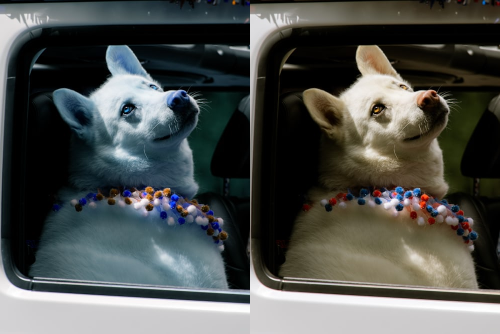

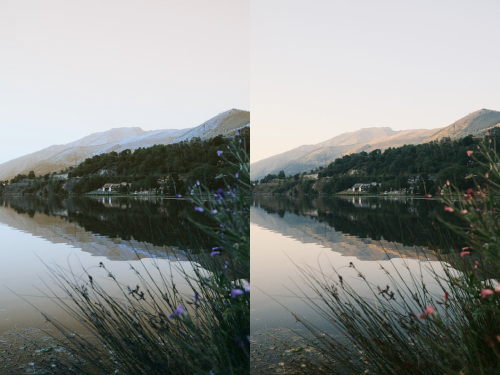

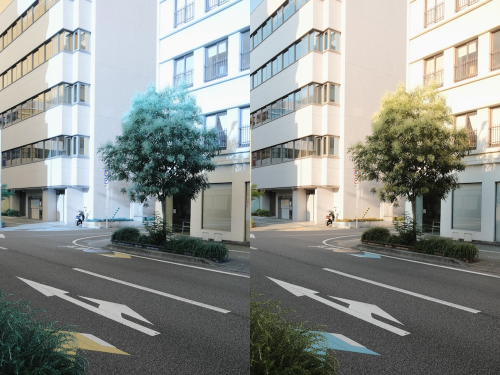



resolusi image: tinggi x lebar =  375  x  250


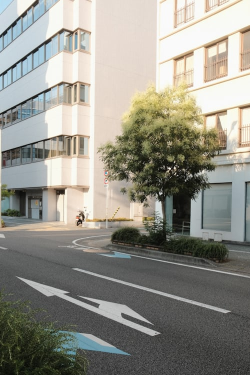

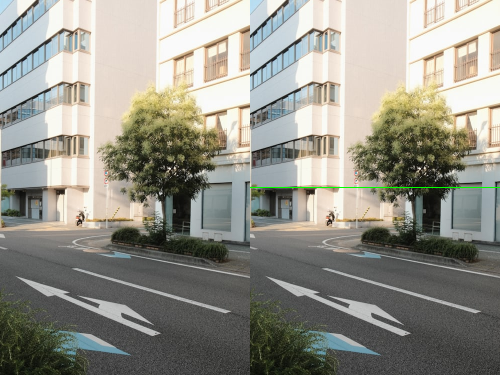

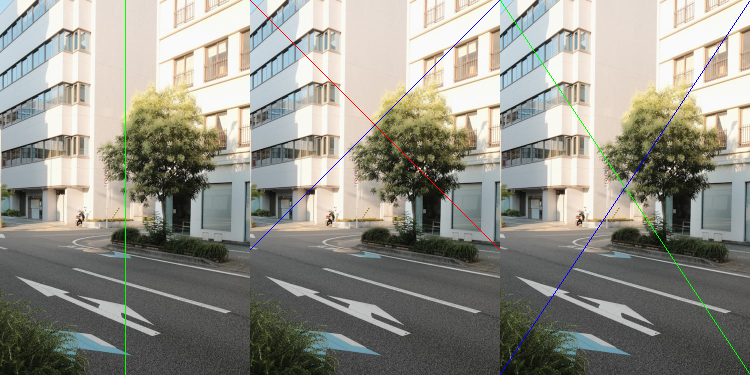

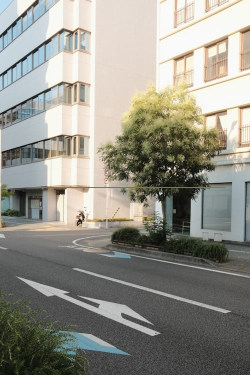




Gambar dengan Kotak Putih:


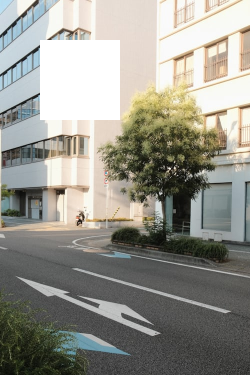

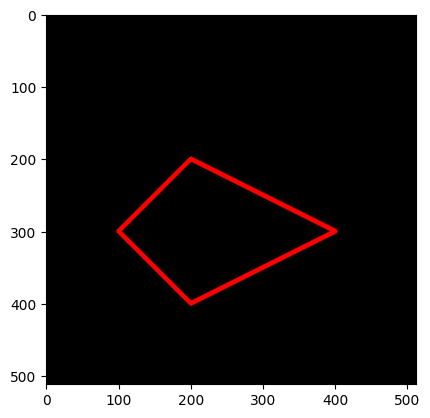

In [1]:
from textwrap import fill
#Langkah 1
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

#Langkah 2
#URL image
urls = ["https://images.unsplash.com/photo-1755311901131-c0b8f91a21c0?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxmZWF0dXJlZC1waG90b3MtZmVlZHw0NHx8fGVufDB8fHx8fA%3D%3D",
        "https://images.unsplash.com/photo-1755177510462-bf74c129428f?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxmZWF0dXJlZC1waG90b3MtZmVlZHwzOHx8fGVufDB8fHx8fA%3D%3D",
        "https://images.unsplash.com/photo-1755139677023-ef90bb4b0a71?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxmZWF0dXJlZC1waG90b3MtZmVlZHwzOXx8fGVufDB8fHx8fA%3D%3D"]

for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame =cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

#Langkah 3
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi," x ", lebar)
cv2_imshow(image_2)
print('\n')

#Langkah 4
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for y in range (lebar):
  image_3[int((tinggi)/2),y] = [0,255,0] #Ganti warna karena kurang kontras

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)
print('\n')

#Garis Vertikal dan Diagonal pada image
image_4 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tengah_x = int(tinggi/2)
tengah_y = int(lebar/2)

for x in range (tinggi):
  image_2[x, tengah_y] = [0,255,0] #Ganti warna karena kurang kontras

#Garis diagonal tanpa cv.line
for z in range (min(tinggi, lebar)):
  image_4[z, z] = [0, 0, 255]

for z in range (min(tinggi, lebar)):
  image_4[z, lebar-1-z] = [255, 0, 0]

#Garis diagonal dengaan cv.line
cv.line(image_5, (0,0), (lebar, tinggi), (0, 255, 0))
cv.line(image_5, (lebar,0), (0, tinggi), (255, 0, 0))

final_frame = cv.hconcat((image_2, image_4, image_5))
cv2_imshow(final_frame)
print("\n")

#Garis panjang tertentu
image_6 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

panjang_garis = 200
posisi_y_tengah = tinggi // 2
mulai_x = (lebar // 2) - (panjang_garis // 2)
akhir_x = (lebar // 2) + (panjang_garis // 2)

# Gambar garis pixel per pixel
for x in range(mulai_x, akhir_x):
  image_6[posisi_y_tengah, x] = [78, 56, 255]

cv2_imshow(image_6)
print("\n")

#Gambar Kotak
image_7 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

posisi_y_mulai = 40
posisi_x_mulai = 40
ukuran_kotak = 80

for y in range(posisi_y_mulai, posisi_y_mulai + ukuran_kotak):
  # Looping untuk setiap kolom (x) dalam area kotak
  for x in range(posisi_x_mulai, posisi_x_mulai + ukuran_kotak):
    # Cek agar posisi tidak keluar dari batas gambar
    if y < tinggi and x < lebar:
      image_7[y, x] = [255, 255, 255] # Ubah warna pixel menjadi Putih

# Tampilkan hasilnya
print("\nGambar dengan Kotak Putih:")
cv2_imshow(image_7)
print("\n")

#D.3
img = cv.imread('/content/drive/MyDrive/Image/Bunny.jpg')
plt.imshow(img)

img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img3)

img_gray = cv.imread('/content/drive/MyDrive/Image/Bunny.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

plt.imshow(img_gray, cmap='gray')

plt.imshow(img_gray, cmap='magma')

img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)
plt.imshow(img5)

#cv.imwrite('/content/drive/MyDrive/Image/Bunny2.tiff', img5)

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)
# ax.imshow(img5)

black_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(black_img)

cv.rectangle(black_img, (384, 0), (510,150), (0,255,0), thickness=10)
plt.imshow(black_img)

cv.rectangle(black_img, (200,200), (300,300), (0,0,255), thickness=15)
plt.imshow(black_img)

cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
plt.imshow(black_img)

cv.circle(black_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1)
plt.imshow(black_img)

cv.line(black_img, (0,0), (512,512), (255,255,255), thickness=5)
plt.imshow(black_img)

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10,500), fontFace=font, fontScale=4, color=(255,255,0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

black_img2 = np.zeros(shape=(512,512,3),dtype=np.int32)
plt.imshow(black_img2)

vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices

pts = vertices.reshape((-1,1,2))
pts

cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)